<a href="https://colab.research.google.com/github/GermanOmar/Wear/blob/master/Wear_HV_CIRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A machine learning approach for microhardness prediction and sliding wear evaluation in materials manufactured by laser powder bed fusion

<a href="https://ibb.co/3vvDZtg"><img src="https://i.ibb.co/Nrr8Bwc/Tests2-TIFF.png" WIDTH="620" HEIGHT="360"  border="0"></a>

 Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install lazypredict
warnings.filterwarnings("ignore")

     |████████████████████████████████| 302 kB 5.0 MB/s 
     |████████████████████████████████| 127.6 MB 21 kB/s 
     |████████████████████████████████| 248 kB 42.6 MB/s 
     |████████████████████████████████| 25.9 MB 926 bytes/s 
     |████████████████████████████████| 1.2 MB 43.5 MB/s 
     |████████████████████████████████| 10.1 MB 42.6 MB/s 
     |████████████████████████████████| 269 kB 42.2 MB/s 
     |████████████████████████████████| 14.5 MB 7.6 kB/s 
     |████████████████████████████████| 72 kB 931 kB/s 
     |████████████████████████████████| 6.8 MB 44.1 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=d33c792fe2412462a530ad4d728c313d74378832d6cc91611da3f821650da412
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully

NameError: ignored

Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

 Upload database:

In [2]:
!git clone https://github.com/GermanOmar/Wear

Cloning into 'Wear'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 49 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (49/49), 1.27 MiB | 5.04 MiB/s, done.


In [ ]:
#Experimental data
data = pd.read_table('/content/Wear/HV2.txt') 
data.describe()


,P,S,L,D,HV
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,193.013699,840.979452,45.684932,5.561233,410.906849
std,108.107906,846.483607,8.948738,2.289946,225.770134
min,80.000000,55.600000,20.000000,2.340000,118.000000
25%,100.000000,250.000000,50.000000,2.590000,188.000000
50%,150.000000,500.000000,50.000000,5.400000,393.200000
75%,280.000000,1000.000000,50.000000,7.800000,540.000000
max,500.000000,5000.000000,50.000000,8.010000,980.300000



Setting inputs - output:

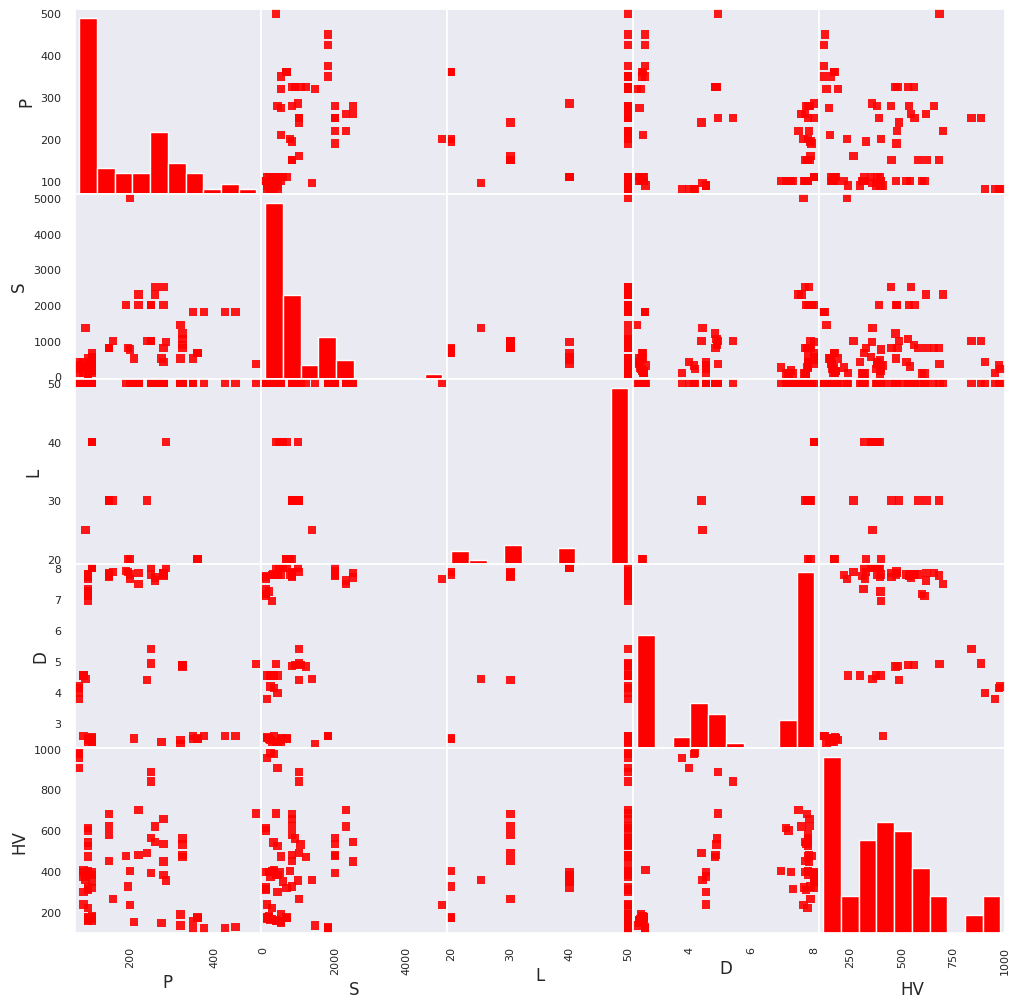

In [ ]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
import seaborn as sns
sns.set()

plt.rcParams["axes.grid"] = False

#pd.tools.plotting.scatter_matrix(df, alpha=0.2, c='red', hist_kwds={'color':['burlywood']})

#scatter_matrix(data, alpha=0.2, marker='s', figsize = (12,12), color = 'blue')
scatter_matrix(data, alpha=0.9,marker='s', figsize = (12,12),  c='red', hist_kwds={'color':['red']})

warnings.filterwarnings("ignore")

In [ ]:
#X=data[['P', 'S', 'L',  'HD1',  'F', 'd' ]]
X=data[['P', 'S', 'L',  'D']]
Y=data['HV'][:,None]

# Hardness prediction

 Split data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4321)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 58  test samples: 15


In [ ]:
YTR=np.mean(y_train)
YTR

410.7206896551724

In [ ]:
YT=np.mean(y_test)
YT

411.6266666666667

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)


###Results:

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:01<00:00, 27.33it/s]

                               Adjusted R-Squared  ...  Time Taken
Model                                              ...            
XGBRegressor                                 0.62  ...        0.02
GradientBoostingRegressor                    0.62  ...        0.07
ExtraTreesRegressor                          0.55  ...        0.13
AdaBoostRegressor                            0.43  ...        0.09
ExtraTreeRegressor                           0.39  ...        0.02
BaggingRegressor                             0.37  ...        0.03
RandomForestRegressor                        0.37  ...        0.19
DecisionTreeRegressor                        0.14  ...        0.01
HistGradientBoostingRegressor                0.07  ...        0.06
LGBMRegressor                                0.05  ...        0.02
OrthogonalMatchingPursuit                    0.03  ...        0.01
OrthogonalMatchingPursuitCV                  0.03  ...        0.02
HuberRegressor                               0.01  ...        

### XGB

In [ ]:
import pickle
import xgboost as xgb

xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

-XGBRegressor -
------------------
MSE test: 19709.884897451597

R2:  0.5727313738924646
RMSE:  140.39189754915202
MAE:  102.29695495605469
IM:  173.70876330574558



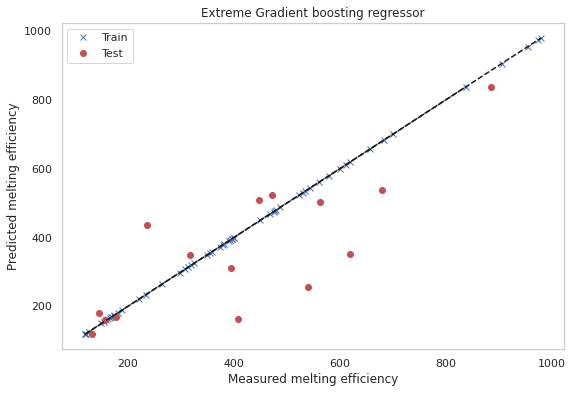

In [ ]:
print("-XGBRegressor -")
print("------------------")
y_star_train = xgbr.predict(X_train)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

#Plots
sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted melting efficiency')
plt.xlabel('Measured melting efficiency')
plt.title("Extreme Gradient boosting regressor")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

In [ ]:
# get importance

importance = xgbr.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 0, Score: 0.31300
Feature: 1, Score: 0.03160
Feature: 2, Score: 0.02474
Feature: 3, Score: 0.63065


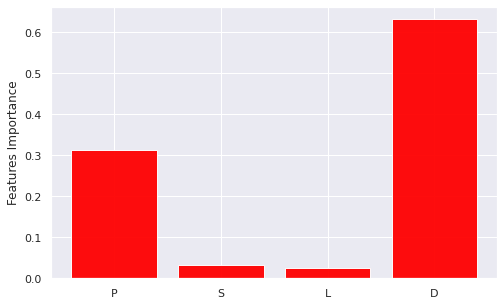

In [ ]:
# Create lists for the plot
import seaborn as sns
sns.set()

#plt.rcParams["axes.grid"] = False

labels = ['P', 'S', 'L',  'D' ]
x_pos = np.arange(len(labels))

fig, ax = plt.subplots()
fig.set_size_inches((8,5))

ax.bar(x_pos, importance, align='center', alpha=0.95, color='red')
ax.set_ylabel('Features Importance')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
#ax.set_title('Features Importance Analysis')
ax.yaxis.grid(True)


## GBR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#KERNEL
#GBR=GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR=GradientBoostingRegressor(n_estimators=1000, random_state=42, learning_rate=0.1 )

#START TRAINING
GBR.fit(X_train, y_train)
#PREDICTION
y_pred=GBR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

 
print("-Gradient boosting regressor-")
print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()


-Gradient boosting regressor-
-----------------------------
MSE test: 10973.330174626639

R2:  0.7621214059883579
RMSE:  104.75366425393739
MAE:  76.81548868643229
IM:  129.89998484598655



## ADA

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

print(" AdaBoost -")
print("------------------")

Ada = AdaBoostRegressor(random_state=42, n_estimators=1000)
#START TRAINING
Ada.fit(X_train,y_train)
#PREDICTION
y_pred=Ada.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

 AdaBoost -
------------------
MSE test: 18441.36325404439

R2:  0.6002302407091018
RMSE:  135.79898104935984
MAE:  103.80134513634513
IM:  170.92759379930285



## RFR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#KERNEL
RFR=RandomForestRegressor(n_estimators=2000,max_depth=20)

#START TRAINING
RFR.fit(X_train,y_train)
#PREDICTION
y_pred=RFR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-----------------------------
MSE test: 19262.240064685626

R2:  0.58243536727828
RMSE:  138.78847237679946
MAE:  104.71527333333178
IM:  173.86115982065263



## Comparisson

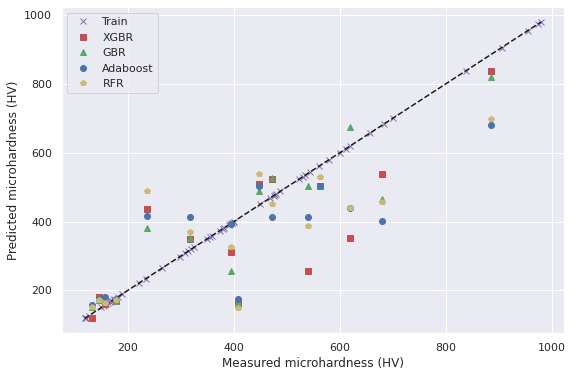

In [ ]:
import seaborn as sns
sns.set()

y1=xgbr.predict(X_test)
y2=GBR.predict(X_test)
y3=Ada.predict(X_test)
y4=RFR.predict(X_test)

#Plots
#sns.set_theme(style="whitegrid")
#sns.set_theme(style="darkgrid")
plt.rcParams["axes.grid"] = True
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'mx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y1, 'rs', label = 'XGBR')
plt.plot(y_test, y2, 'g^', label = 'GBR')
plt.plot(y_test, y3, 'bo', label = 'Adaboost')
plt.plot(y_test, y4, 'yp', label = 'RFR')

plt.legend()
plt.ylabel('Predicted microhardness (HV)')
plt.xlabel('Measured microhardness (HV)')
#plt.title("Machine learning regressors")
print()



### CROSS-VALIDATION

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score as CV

import warnings
warnings.filterwarnings('ignore')

models = [ xgbr,  GBR, Ada, RFR ]
labels = ['XGBR',  'GBR', 'Adaboost', 'RFR']
IMS = []

print("--------------------------------------------------------------")
print("%5s | %5s | %5s | %5s | %5s " % ("ML algorithm",  "CV-R2", "CV-MSE", "CV-MAE", "IM"))
print("--------------------------------------------------------------")

for mod, label in zip( models, labels): 
  #y_star = mod.predict(X)
 
  scoreR2 = CV(mod, X_train, y_train, cv=5, scoring='r2')
  #print(-1*scoreR2)
  scoreMSE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  #print(-1*scoreMSE)
  scoreMAE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
  #print(-1*scoreMAE)
  IM=np.sqrt(((1-scoreR2)**2) + (scoreMSE) + (scoreMAE**2) )
  #print("IM: ", IM)
  
 
  print("%15s | %.4f | %.4f | %.4f | %.4f " % (label,  scoreR2.mean(), -1*scoreMSE.mean(), -1*scoreMAE.mean() , np.sqrt(((1-scoreR2.mean())**2) + (-1*scoreMSE.mean()) + (scoreMAE.mean()**2) )))
print("--------------------------------------------------------------")

--------------------------------------------------------------
ML algorithm | CV-R2 | CV-MSE | CV-MAE |    IM 
--------------------------------------------------------------
           XGBR | 0.6516 | 16118.6454 | 84.8690 | 152.7138 
            GBR | 0.6467 | 16060.2004 | 87.2538 | 153.8621 
       Adaboost | 0.7224 | 12395.5841 | 76.7778 | 135.2423 
            RFR | 0.7046 | 13779.1618 | 80.0813 | 142.0995 
--------------------------------------------------------------


# Wear evaluation

In [3]:
#Experimental data
data = pd.read_table('/content/Wear/wear.txt') 
data.describe()

,LP,SS,LT,RD,HBM,HCB,F,D,w,K
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,173.870968,591.895161,44.354839,5.762581,439.427419,1229.274194,9.653226,158.173042,2.880145,10.420758
std,117.910147,523.769677,8.419526,2.167730,218.076880,645.368878,14.458870,76.361416,3.321766,11.435778
min,25.000000,55.600000,20.000000,2.400000,145.000000,600.000000,3.000000,70.371675,0.003000,0.014000
25%,100.000000,200.000000,40.000000,4.342500,309.250000,746.000000,3.000000,105.557513,0.429750,1.168500
50%,110.000000,400.000000,50.000000,4.990000,399.500000,830.000000,4.950000,133.203529,1.470000,7.363000
75%,247.500000,800.000000,50.000000,7.872500,538.500000,1601.500000,5.750000,211.115026,4.391750,14.517750
max,800.000000,2000.000000,50.000000,8.010000,980.300000,2800.000000,50.000000,592.500000,11.900000,48.305000


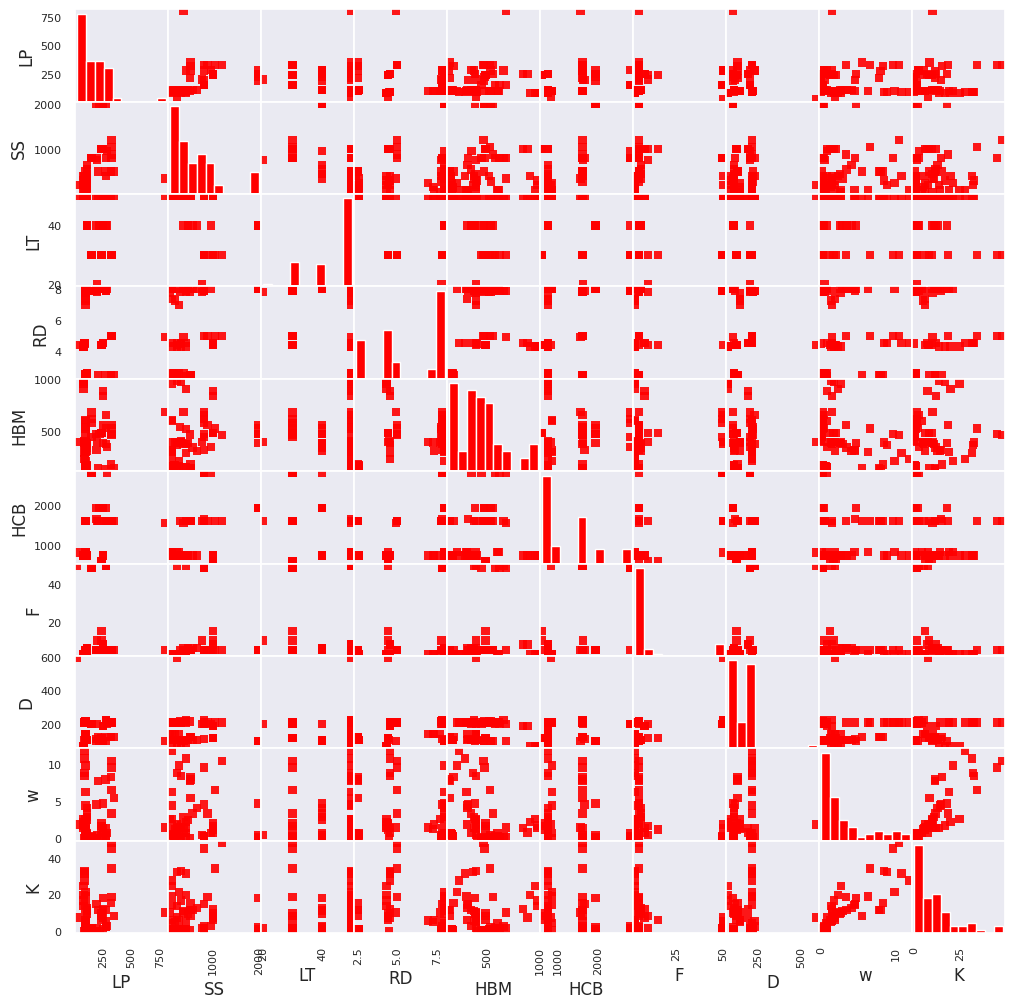

In [4]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
import seaborn as sns
sns.set()

plt.rcParams["axes.grid"] = False

#pd.tools.plotting.scatter_matrix(df, alpha=0.2, c='red', hist_kwds={'color':['burlywood']})

#scatter_matrix(data, alpha=0.2, marker='s', figsize = (12,12), color = 'blue')
scatter_matrix(data, alpha=0.9,marker='s', figsize = (12,12),  c='red', hist_kwds={'color':['red']})

warnings.filterwarnings("ignore")

Text(0.5, 0, 'Wear coefficient')

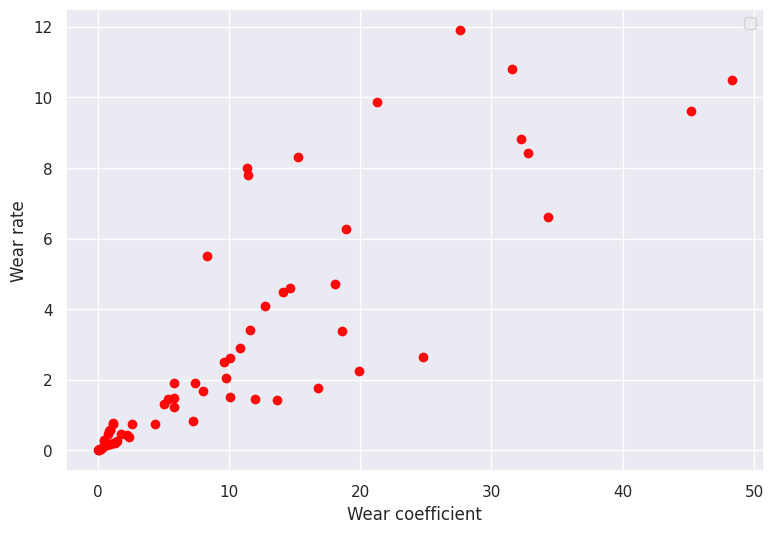

In [5]:
#Plots
#sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = True
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(data['K'], data['w'], alpha=0.95, color='red',  marker='o', linestyle='None')

plt.legend()
plt.ylabel('Wear rate')
plt.xlabel('Wear coefficient')


In [6]:
#X=data[[ 'HBM', 'HCB', 'F','D', 'K']]
X=data[['LP','SS', 'LT', 'RD', 'HBM', 'HCB', 'F','D', 'K']]
Y=data['w'][:,None]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=432)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 49  test samples: 13


In [10]:
YW1=np.mean(y_train)
YW1

3.0335510204081633

In [11]:
YW2=np.mean(y_test)
YW2

2.3019230769230767

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

XGBR

Random search optimization

GBR

AdaBoost

GPR

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
 
GP=GPR(alpha=0.001, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=40, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=432)
 
#Training
GP.fit(X_train,y_train)
 
#Testing
y_star_train = GP.predict(X_train)
y_pred = GP.predict(X_test)
 
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test, y_pred)
MSE_train = mean_squared_error(y_train, y_star_train)
 
print("Gaussian Process")
print('MSE train:', MSE_train)
print('MSE test:', MSE_test)
print("MSE train < MSE test?", MSE_train < MSE_test)
print()
from sklearn.metrics import r2_score
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)
R2_test=r2_score(y_test, y_pred)
print('R2_test: ',R2_test)
print()
""" 
RE=100 * abs(y_test - y_pred) / y_test
print('Relative error (%): ',RE)
"""
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 
#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

Gaussian Process
MSE train: 0.0006901105931471155
MSE test: 0.45009690739074376
MSE train < MSE test? True

R2_train:  0.9999439798895327
R2_test:  0.9085058495391372

R2:  0.9085058495391372
RMSE:  0.6708926198660585
MAE:  0.5098108906313749
IM:  0.8475701924711926



C-V

## Uncertainty quantification

Gaussian Process
MSE train: 0.0006901105931471155
MSE test: 0.45009690739074376
MSE train < MSE test? True

R2_train:  0.9999439798895327
R2_test:  0.9085058495391372

R2:  0.9085058495391372
RMSE:  0.6708926198660585
MAE:  0.5098108906313749
IM:  0.8475701924711926



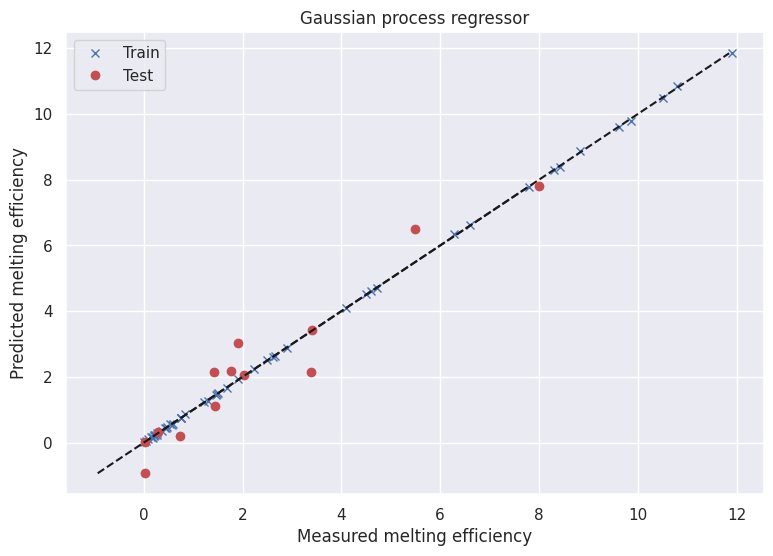

In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
 
GP=GPR(alpha=0.001, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=40, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=432)
 
#Training
GP.fit(X_train,y_train)
 
#Testing
y_star_train = GP.predict(X_train)
y_pred = GP.predict(X_test)
 
#Plots
sns.set_theme(style="darkgrid")
plt.rcParams["axes.grid"] = True
fig = plt.figure()
fig.set_size_inches((9,6))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted melting efficiency')
plt.xlabel('Measured melting efficiency')
plt.title("Gaussian process regressor")
 
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test, y_pred)
MSE_train = mean_squared_error(y_train, y_star_train)
 
print("Gaussian Process")
print('MSE train:', MSE_train)
print('MSE test:', MSE_test)
print("MSE train < MSE test?", MSE_train < MSE_test)
print()
from sklearn.metrics import r2_score
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)
R2_test=r2_score(y_test, y_pred)
print('R2_test: ',R2_test)
print()
""" 
RE=100 * abs(y_test - y_pred) / y_test
print('Relative error (%): ',RE)
"""
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 
#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

In [97]:
X=data['w'][:,None]
Y=data['K'][:,None]

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 49  test samples: 13


Analitical model

Text(0, 0.5, 'Wear rate')

<Figure size 640x480 with 0 Axes>

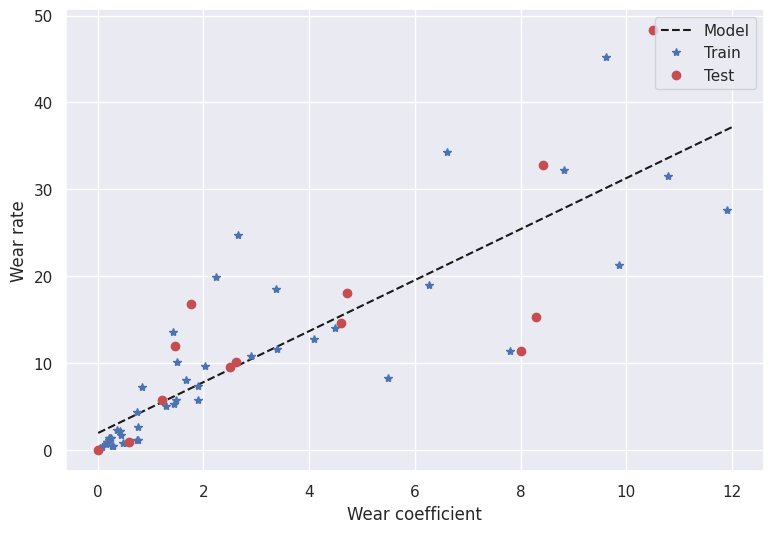

In [105]:
def f(x):
  return  2.9321*x + 1.9759
  #return  0.2166*x + 0.5047

Xs = np.linspace(0.01,12,30)
Ys=f(Xs)
plt.figure()
plt.figure(figsize =(9, 6))
plt.plot(Xs, Ys, 'k--',  label = 'Model')
plt.plot(X_train, y_train, 'b*', label = 'Train')
plt.plot(X_test, y_test, 'ro', label = 'Test')
plt.legend()
plt.xlabel('Wear coefficient')
plt.ylabel('Wear rate')

<Figure size 640x480 with 0 Axes>

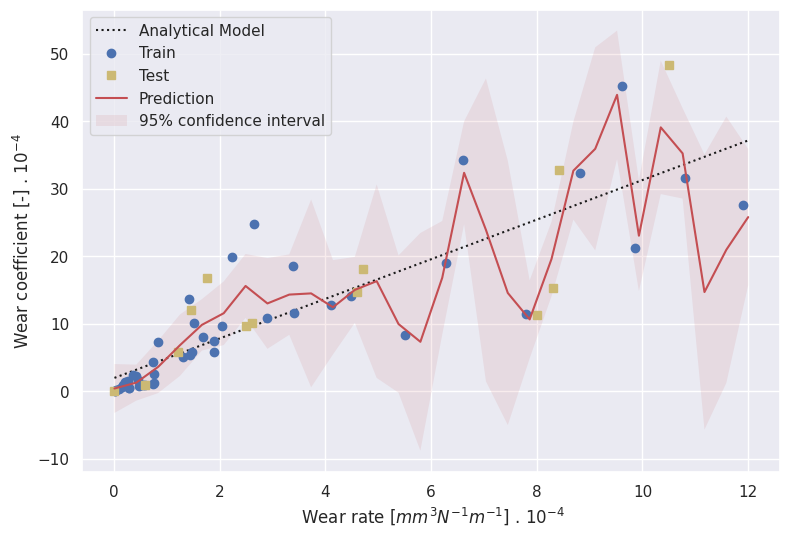

In [106]:
#Tunning hiperparameters (Testing data)
def f(x):
  return 2.9321*x + 1.9759

X2 = np.asarray(X)
y2 = np.asarray(Y).ravel()

x2 = np.atleast_2d(np.linspace(0.01,12,30)).T

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-3, 1e3))
model = GPR(kernel=kernel, n_restarts_optimizer=10, alpha=0.12 , normalize_y=True)

model.fit(X2, y2)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = model.predict(x2, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
plt.figure()
plt.figure(figsize =(9, 6)) 
plt.plot(x2, f(x2), 'k:', label=r'Analytical Model')
plt.plot(X_train, y_train, 'bo', label = 'Train')
plt.plot(X_test, y_test, 'ys', label = 'Test')
plt.plot(x2, y_pred, 'r-' , label='Prediction')
plt.fill(np.concatenate([x2, x2[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.1, fc='r', ec='None', label='95% confidence interval')
plt.xlabel(' Wear rate [$ {mm^{3} N^{−1} m^{−1}}$] . $10^{−4}$ ')
plt.ylabel('Wear coefficient [-] . $10^{−4}$')
plt.legend(loc='upper left')

plt.savefig("fig_7.png", dpi=600)